In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 450kB 47.7MB/s 
     |████████████████████████████████| 3.9MB 38.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=b2d9b6ff75d638cd81ba726d4f0145db8c7795623eb5e51e36cea36df0d8bb31
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstall

In [0]:
!unzip /content/drive-download-20200428T190033Z-001.zip

Archive:  /content/drive-download-20200428T190033Z-001.zip
  inflating: ValidationOnly.tsv      
  inflating: Ty.txt                  
  inflating: FinalTest.tsv           
  inflating: FinalTrainingOnly.tsv   


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding ,Bidirectional
from sklearn.model_selection import train_test_split
import torch
from sklearn.model_selection import train_test_split

In [0]:
d = pd.read_csv('/content/FinalTrainingOnly.tsv', sep="\t", header=None )

x=d[1]
y=d[2]
y=list(y)
x=list(x)

for i in range(len(x)):
  if type(x[i])==float:
    x[i]=" "
    y[i]= 1

y=np.array(y)

In [0]:
v = pd.read_csv('/content/ValidationOnly.tsv', sep="\t", header=None )

vx=v[1]
vy=v[2]
vy=list(vy)
vx=list(vx)

for i in range(len(vx)):
  if type(vx[i])==float:
    vx[i]=" "
    vy[i]= 1

vy=np.array(vy)

In [0]:
t = pd.read_csv('/content/FinalTest.tsv', sep="\t", header=None )
tx=list(t[1])
for i in range(len(tx)):
  if type(tx[i])==float:
    tx[i]=" "

In [0]:
ty = pd.read_csv('/content/Ty.txt', sep=",", header=None )
sentiment = []
for i in range(len(ty)):
    if ty[1][i]=='negative':
        sentiment.append(0)
    elif ty[1][i]=='neutral':
        sentiment.append(1)
    elif ty[1][i]=='positive':
        sentiment.append(2)

ty = np.array(sentiment)

In [0]:
tokenizer = Tokenizer(num_words=2500,split=' ')
tokenizer.fit_on_texts(x)

X= tokenizer.texts_to_sequences(x)
X = pad_sequences(X,maxlen=50)

VX= tokenizer.texts_to_sequences(vx)
VX = pad_sequences(VX,maxlen=50)


TX = tokenizer.texts_to_sequences(tx)
TX = pad_sequences(TX,maxlen=50)

In [0]:
vocab_size = 20000
embed_size = 128
epochs = 150

In [0]:
# Model no 1

model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape = (X.shape[1],)))
model.add(LSTM(units=264, activation='tanh'))
model.add(Dense(units=64,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07), loss="sparse_categorical_crossentropy", metrics = ['accuracy'])
history = model.fit(X, y, epochs=epochs, batch_size=128,verbose=2,validation_data=(VX,vy))

Train on 14594 samples, validate on 3000 samples
Epoch 1/150
14594/14594 - 11s - loss: 1.1455 - accuracy: 0.4246 - val_loss: 1.0816 - val_accuracy: 0.4520
Epoch 2/150
14594/14594 - 4s - loss: 0.8807 - accuracy: 0.5811 - val_loss: 0.7769 - val_accuracy: 0.6510
Epoch 3/150
14594/14594 - 4s - loss: 0.8052 - accuracy: 0.6434 - val_loss: 0.7579 - val_accuracy: 0.6593
Epoch 4/150
14594/14594 - 4s - loss: 0.7427 - accuracy: 0.6821 - val_loss: 0.7154 - val_accuracy: 0.7030
Epoch 5/150
14594/14594 - 4s - loss: 0.6984 - accuracy: 0.7137 - val_loss: 0.7102 - val_accuracy: 0.7050
Epoch 6/150
14594/14594 - 4s - loss: 0.6478 - accuracy: 0.7451 - val_loss: 0.7014 - val_accuracy: 0.7163
Epoch 7/150
14594/14594 - 4s - loss: 0.6307 - accuracy: 0.7545 - val_loss: 0.6987 - val_accuracy: 0.7347
Epoch 8/150
14594/14594 - 4s - loss: 0.5922 - accuracy: 0.7763 - val_loss: 0.6841 - val_accuracy: 0.7400
Epoch 9/150
14594/14594 - 4s - loss: 0.5603 - accuracy: 0.7882 - val_loss: 0.6341 - val_accuracy: 0.7697
Epoch

In [0]:
a = model.predict_classes(VX)
for i in range(len(a)):
  print(str(a[i])+"     "+str(vy[i]))

2     2
1     0
0     0
1     1
2     2
2     2
2     2
2     2
2     2
2     2
2     2
2     2
0     0
1     1
0     1
0     1
1     1
2     2
2     2
0     2
0     0
2     2
2     2
0     0
1     2
2     2
0     0
0     0
2     2
0     0
0     0
1     1
0     0
1     1
1     0
2     2
0     0
2     2
1     0
2     2
2     2
1     1
0     0
0     0
2     2
1     1
0     0
1     1
2     2
2     2
0     0
1     2
2     1
2     2
1     1
1     1
1     1
1     1
2     2
2     2
0     0
1     1
2     2
2     2
0     0
0     0
2     2
1     1
2     2
2     2
0     0
0     0
2     2
0     0
2     1
0     1
2     2
1     1
0     0
1     1
1     1
2     1
1     1
2     2
1     0
0     0
1     1
2     2
1     1
1     1
2     2
0     0
1     2
1     1
0     0
0     0
2     2
1     1
2     1
0     0
0     0
0     0
1     1
1     1
2     2
1     1
0     0
0     0
1     1
2     2
0     0
2     2
1     1
0     0
0     0
1     1
1     1
2     2
2     2
1     0
2     1
0     0
2     2
2     2
2     2


In [0]:
val_loss, val_acc = model.evaluate(VX,vy)
print("validation accuracy = " + str(val_acc) )

3000/3000 [==============================] - 0s 121us/sample - loss: 0.7983 - accuracy: 0.8190
validation accuracy = 0.819


In [0]:
test_loss, test_acc = model.evaluate(TX,ty)
print("Test accuracy = " + str(test_acc) )

3000/3000 [==============================] - 0s 120us/sample - loss: 2.2547 - accuracy: 0.5640
Test accuracy = 0.564


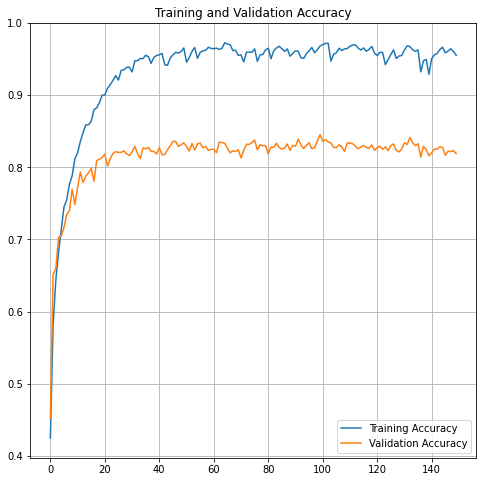

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

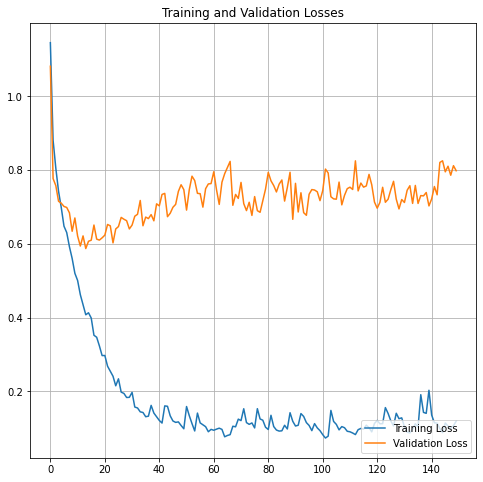

In [0]:
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.grid()
plt.legend(loc='lower right')
plt.title('Training and Validation Losses')
plt.show()